In [13]:
pip install yellowbrick

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
customer_data= pd.read_csv('Mall_Customers.csv')


In [5]:
customer_data.shape

(200, 5)

### This shows that there are total 200 records in the data set with total 5 attributes

## Attributes
* CustomerId
* Age
* Annual income in thousand dollars
* Spending Score

In [6]:
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
customer_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Inference: No null values present in the dataset

In [9]:
#Dropping Unnecessary features
customer_data.drop("CustomerID", axis = 1, inplace = True)

In [10]:
customer_data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [11]:
pd.DataFrame(customer_data.groupby('Gender').size(), columns=['Count'])

,Count
Gender,
Female,112
Male,88


In [12]:
customer_data.groupby("Gender").agg({'Annual Income (k$)':'mean',
                          'Spending Score (1-100)': 'mean'}).style.background_gradient()

,Annual Income (k$),Spending Score (1-100)
Gender,,
Female,59.250000,51.526786
Male,62.227273,48.511364


## KMeans Clustering 

For Customer Income vs Spending

#### Finding the value of k using Elbow method

In [14]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [15]:
#Creating a dataframe for Income Vs Spending
income_spending_df = customer_data[['Annual Income (k$)','Spending Score (1-100)']]

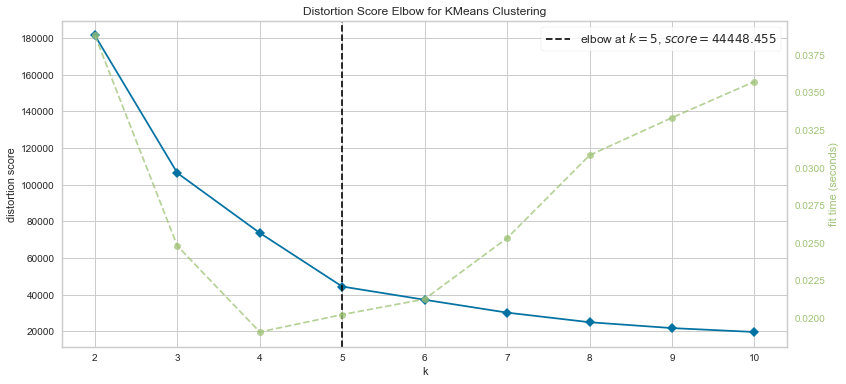

In [19]:
plt.figure(figsize = (13,6))
elbow_visualizer = KElbowVisualizer(KMeans(), k = 10)
elbow_visualizer.fit(income_spending_df)
elbow_visualizer.show()

#### k=5,it is the optimal number of clusters for income_spending_df

### Traning the Algorithm

In [24]:
model = KMeans(n_clusters=5,init = 'k-means++', random_state = 0)
y_kmeans = model.fit_predict(income_spending_df)

In [31]:
income_spending_df['Cluster_No'] = y_kmeans

<ipython-input-31-e5c1b9be4ccc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_spending_df['Cluster_No'] = y_kmeans


In [32]:
cluster_1 = income_spending_df[income_spending_df['Cluster_No'] == 0]
cluster_2 = income_spending_df[income_spending_df['Cluster_No'] == 1]
cluster_3 = income_spending_df[income_spending_df['Cluster_No'] == 2]
cluster_4 = income_spending_df[income_spending_df['Cluster_No'] == 3]
cluster_5 = income_spending_df[income_spending_df['Cluster_No'] == 4]

In [34]:
cluster_centers = model.cluster_centers_
cluster_centers

array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

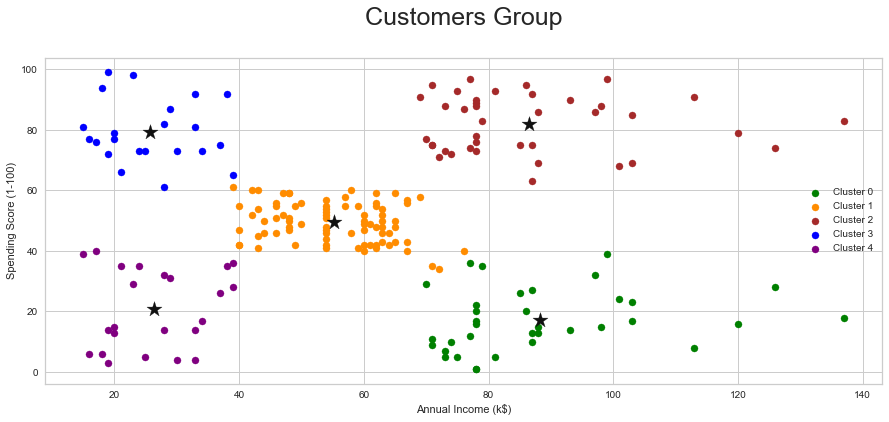

In [38]:
plt.figure(figsize = (15,6))
plt.title("Customers Group\n", size = 25)
plt.scatter(cluster_1['Annual Income (k$)'], cluster_1['Spending Score (1-100)'], s=50, color = 'green', label = "Cluster 0")
plt.scatter(cluster_2['Annual Income (k$)'], cluster_2['Spending Score (1-100)'], s=50, color = 'darkorange', label = "Cluster 1")
plt.scatter(cluster_3['Annual Income (k$)'], cluster_3['Spending Score (1-100)'], s=50, color = 'brown', label = "Cluster 2")
plt.scatter(cluster_4['Annual Income (k$)'], cluster_4['Spending Score (1-100)'], s=50, color = 'blue', label = 'Cluster 3')
plt.scatter(cluster_5['Annual Income (k$)'], cluster_5['Spending Score (1-100)'], s=50, color = 'purple', label = 'Cluster 4')

plt.scatter(cluster_centers[:,0], cluster_centers[:, 1], s = 250, c = 'k', marker='*')

plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend();

The K-Means model segments the data into distinct clusters based on customer's spending and income. Cluster 1 in the center of the graph consists of customers with average spending scores, between 35-61, and incomes between  $ 40,000  and  $ 71,000.Clusters 0 and 4, both identify customers with lower spending scores that are below 40 and subdivides the groups according to their income. In contrast, Clusters 2 and 3 consist of customers with higher spending scores, above 61, and are further partitioned based on their income.

Based on customer spending habits, the company could target customers, where customers have higher spending scores above 60 and would likely be more inclined to becoming a member. One of the distinguishing factors between these clusters and the other clusters in the model is that they consist of customers who are under the age of 40, which indicates that the company could aim at customers who are younger than 40 and have higher spending scores. To engage customers with lower spending scores, the company could target these groups with more of their popular products and promotions. In the future, to better understand customer preferences, additional data about the frequency and types of purchases made could be used to further customize product offerings to each segment.
